In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:

data = pd.read_csv("/content/creditcard.csv")


In [16]:
# Data Analysis
print("Data Information:")
print(data.info())
print("\nFirst 5 rows of the data:")
print(data.head())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103088 entries, 0 to 103087
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    103088 non-null  int64  
 1   V1      103088 non-null  float64
 2   V2      103088 non-null  float64
 3   V3      103088 non-null  float64
 4   V4      103088 non-null  float64
 5   V5      103088 non-null  float64
 6   V6      103088 non-null  float64
 7   V7      103088 non-null  float64
 8   V8      103088 non-null  float64
 9   V9      103088 non-null  float64
 10  V10     103088 non-null  float64
 11  V11     103088 non-null  float64
 12  V12     103088 non-null  float64
 13  V13     103088 non-null  float64
 14  V14     103088 non-null  float64
 15  V15     103088 non-null  float64
 16  V16     103088 non-null  float64
 17  V17     103088 non-null  float64
 18  V18     103088 non-null  float64
 19  V19     103088 non-null  float64
 20  V20     103088 non-null  float

In [17]:
# Check for missing values
print("\nNull value analysis:")
print(data.isnull().sum())


Null value analysis:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [18]:
# Check data types
print("\nData Types:")
print(data.dtypes)



Data Types:
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [19]:
# Data Preprocessing
# Handle missing values
data.fillna(0, inplace=True)



In [20]:
# Check column names
print("Column Names:")
print(data.columns)


Column Names:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [21]:
scaler = StandardScaler()
numerical_features = ['Amount', 'Time'] + ['V'+str(i) for i in range(1, 29)] # Assuming these are numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [22]:
# Check if there are categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

if categorical_features:
    # Perform one-hot encoding for categorical features
    data = pd.get_dummies(data, columns=categorical_features)
    print("Categorical features have been one-hot encoded.")
else:
    print("No categorical features present.")


No categorical features present.


In [23]:
# Handle class imbalance issues
# Assuming the target variable is 'class' where 1 indicates fraud and 0 indicates genuine
fraudulent_count = data['Class'].sum()
total_transactions = len(data)
fraudulent_percentage = fraudulent_count / total_transactions

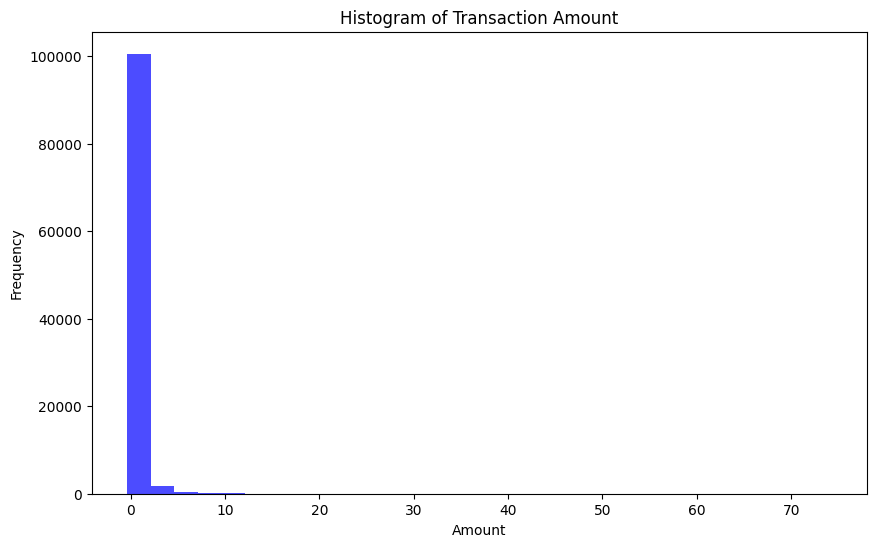

In [24]:
# Graph 1: Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


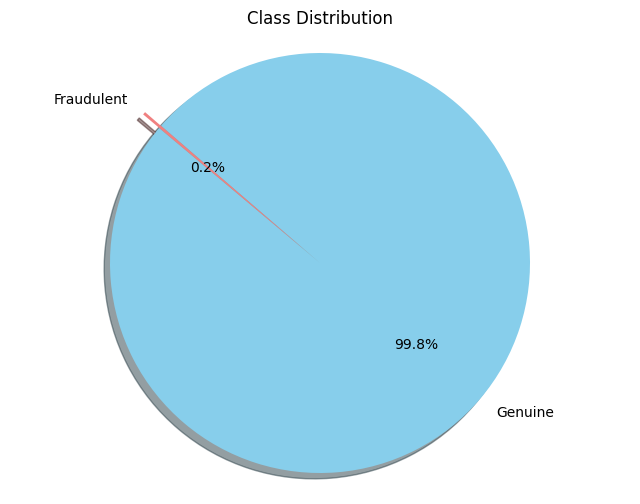

In [25]:
# Graph 2: Pie Chart (Class Distribution)
plt.figure(figsize=(8, 6))
labels = ['Genuine', 'Fraudulent']
sizes = [total_transactions - fraudulent_count, fraudulent_count]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # explode 2nd slice (i.e., 'Fraudulent')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

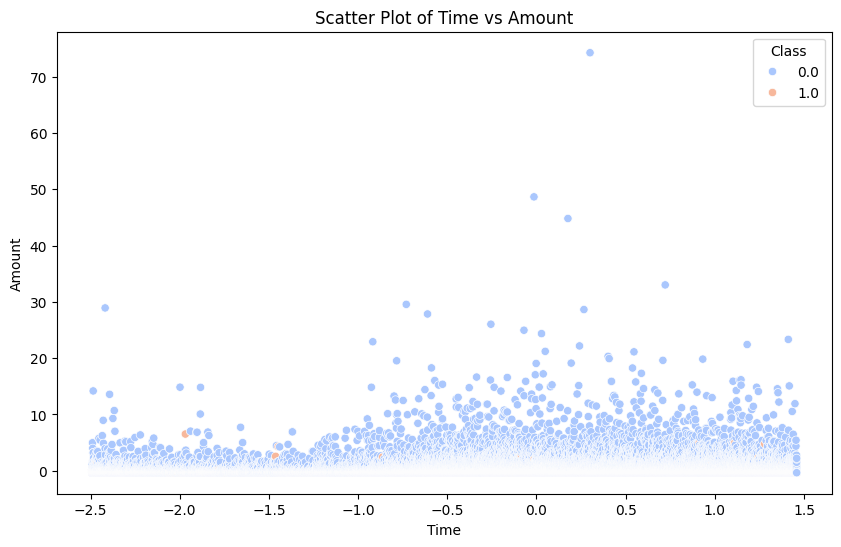

In [26]:
# Graph 3: Scatter Plot (assuming 'time' vs 'amount')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=data, hue='Class', palette='coolwarm')
plt.title('Scatter Plot of Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

In [27]:
# Split the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [28]:
# Train a Random Forest classifier
model = RandomForestClassifier()

In [29]:
# Oversampling or undersampling (choose one or none)
oversampler = RandomOverSampler(sampling_strategy=0.5)  # Adjust sampling strategy as needed
undersampler = RandomUnderSampler(sampling_strategy=0.5)  # Adjust sampling strategy as needed
pipeline = Pipeline([('oversample', oversampler), ('model', model)])  # For oversampling
pipeline = Pipeline([('undersample', undersampler), ('model', model)])  # For undersampling
model = pipeline

In [30]:
# Fit the model
model.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     20565
         1.0       0.19      0.81      0.30        53

    accuracy                           0.99     20618
   macro avg       0.59      0.90      0.65     20618
weighted avg       1.00      0.99      0.99     20618

